# PAUTAS GENERALES


*   Contar la historia de sus datos
*   Comentar todas las celdas
*   Limpieza de datos
*   Graficas para el EDA
*   Análisis Univariado, Bivariado y Multivariado
*   Contruccion de modelos de clasificación
*   Evaluacion de modelos



# Conformación del equipo de trabajo.

###Harold Carvajal
37 años, ingeniero en sonido de profesión y actualmente transicionando a cientista de datos, el gusto y la capacidad de analizar y buscar formas creativas de dar solución  a problemas determinados fueron las que me llevaron a dar este paso.

###Marcos Castelli
41 años, Analista de Datos, formandome como Cientifico de Datos. Con experiencia en Business Intelligence, actualmente trabajando para un Holding dedicado al agro.

###Gabriel Perez
26 años, Ingeniero en informática. Actualmente becario de doctorado investigando modelos de datos para la detección de objetos en imagenes microscópicas. 

###Gonzalo Villafañe
32 años, Tecnico Superior en Programación y futuro estudiante de la licenciatura de business Analytics en la escuela de Negocios ADEN.

# Presentación de la empresa, organización o problema específico.


Una empresa de viajes y tours turísticos ofrece paquetes de seguro a sus clientes. Actualmente la empresa está desarrollando un nuevo paquete de cobertura, debido a esto la compañía necesita saber qué clientes estarían interesados en comprarlo según el historial de su base de datos.

El seguro se ofreció a algunos de sus clientes en el año 2019 y los datos proporcionados se extrajeron del rendimiento / ventas del paquete durante ese período. Los datos recolectados son de casi 2000 de sus clientes y se requiere de un modelo estadístico que pueda predecir si el cliente estará interesado en comprar o no el paquete de seguro de viaje en función de ciertos parámetros.

# Preguntas y objetivos de la investigación.

Preguntas:
* ¿Que relaciones existen entre cada una de las variables? 
* ¿Cual es el nivel de importancia de cada variable en el resultado? 
* ¿El modelo brinda resultados relevantes o es preferible ofrecer el seguro a todos los clientes?

Objetivos:
* Realizar limpieza y filtrado de datos.
* Realizar el análisis exploratorio de datos para poder entender las variables y encontrar relaciones útiles para la implementación de estrategias de captación de nuevos clientes.
*Aplicar diferentes modelos de ML con la finalidad de predecir si un cliente determinado querrá comprar el paquete de seguros.


# Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).

El dataset se denomina Travel Insurance Prediction Data. Clasifica con la variable "TravelInsurance", la cual se utilizará para predecir si un cliente determinado querrá comprar el paquete de seguros.

Link: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data

En total tiene 9 columnas en los datos, las cuáles se describen a continuación:

* Age: Edad del cliente.
* Employment Type: El sector en el que está empleada el cliente.

* Graduate or Not: Si el cliente es graduado universitario o no.

* Annual Income: El ingreso anual del cliente en rupias indias.

* Family Members: Número de miembros en la familia del cliente.

* Chronic Disease: Si el cliente sufre de alguna enfermedad o condición importante como diabetes, presión arterial alta o asma, etc.

* Frequent Flyer: Indica si el cliente ha realizado al menos cuatro viajes a diferentes locaciones en los últimos dos años (2017-2019).

* Ever Travelled Abroad: Indica si el cliente ha realizado alguna vez un viaje a un país extranjero.

* Travel Insurance: ¿El cliente compró un paquete de seguro de viaje durante la oferta de lanzamiento celebrada en el año 2019?.




# Data wrangling. Filtros aplicados a los datos. Distribución. Dataset final para analizar.

*Importamos  las librerias que vamos a utilizar para nuestro analisis.* 


In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


###Importamos el archivo csv llamado Travellnsurance.

In [1]:
df = pd.read_csv('dbo.FactMine.csv')
df.head()

NameError: name 'pd' is not defined

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


*No contiene ninguna columna con registros nulos, desconocidos, indefinido o no inicializado.*

###Verificamos  los valores unicos de cada columna de tipo object

In [82]:
objets = df.select_dtypes(include = ["object"])
for i in objets:
    unicos = df[i].unique()
    print('valores únicos de la columna ' +i )
    print(unicos)
    print()

valores únicos de la columna Employment Type
['Government Sector' 'Private Sector/Self Employed']

valores únicos de la columna GraduateOrNot
['Yes' 'No']

valores únicos de la columna FrequentFlyer
['No' 'Yes']

valores únicos de la columna EverTravelledAbroad
['No' 'Yes']



*Los valores de las variables objects solo tienen 2 valores que pueden ser modificados por 0 y 1.*

##Data wrangling

* Eliminamos la columna que tiene los índices por no ser relevante en el análisis. 

* Cambiamos a valor bool (0,1) a las columnas con solamente 2 valores. En el caso de 'Employment Type', elijo a 'Government Sector' como identificador de la columna y coloco 0 o 1 en los respectivos casos. 

* Creamos una nueva variable "AnnualincomePercapita" que será el ingreso anual dividido los miembros de familia. Analizaremos su impacto en el modelo.

In [83]:
df.drop(columns='Unnamed: 0', inplace= True)
df = df.replace({'Yes': 1, 'No': 0})
df = df.rename(columns={"Employment Type": "Government Sector"})
df = df.replace({'Government Sector': 1, 'Private Sector/Self Employed': 0})
df['AnnualincomePercapita'] = round(df['AnnualIncome']/df['FamilyMembers'],3)
df.head()

Age  Government Sector  GraduateOrNot  AnnualIncome  FamilyMembers  \
0   31                  1              1        400000              6   
1   31                  0              1       1250000              7   
2   34                  0              1        500000              4   
3   28                  0              1        700000              3   
4   28                  0              1        700000              8   

   ChronicDiseases  FrequentFlyer  EverTravelledAbroad  TravelInsurance  \
0                1              0                    0                0   
1                0              0                    0                0   
2                1              0                    0                1   
3                1              0                    0                0   
4                1              1                    0                0   

   AnnualincomePercapita  
0              66666.667  
1             178571.429  
2             125000.000  
3             233333.333  
4              87500.000

*Con el comando dtypes podemos visualizar los tipos datos de cada columna*

In [84]:
df.dtypes

Age                        int64
Government Sector          int64
GraduateOrNot              int64
AnnualIncome               int64
FamilyMembers              int64
ChronicDiseases            int64
FrequentFlyer              int64
EverTravelledAbroad        int64
TravelInsurance            int64
AnnualincomePercapita    float64
dtype: object

Descripción del dataframe

In [85]:
df.describe().T

count           mean            std         min  \
Age                    1987.0      29.650226       2.913308      25.000   
Government Sector      1987.0       0.286865       0.452412       0.000   
GraduateOrNot          1987.0       0.851535       0.355650       0.000   
AnnualIncome           1987.0  932762.959235  376855.684748  300000.000   
FamilyMembers          1987.0       4.752894       1.609650       2.000   
ChronicDiseases        1987.0       0.277806       0.448030       0.000   
FrequentFlyer          1987.0       0.209864       0.407314       0.000   
EverTravelledAbroad    1987.0       0.191243       0.393379       0.000   
TravelInsurance        1987.0       0.357323       0.479332       0.000   
AnnualincomePercapita  1987.0  221469.082767  125685.960608   33333.333   

                            25%       50%          75%        max  
Age                        28.0      29.0       32.000       35.0  
Government Sector           0.0       0.0        1.000        1.0  
GraduateOrNot               1.0       1.0        1.000        1.0  
AnnualIncome           600000.0  900000.0  1250000.000  1800000.0  
FamilyMembers               4.0       5.0        6.000        9.0  
ChronicDiseases             0.0       0.0        1.000        1.0  
FrequentFlyer               0.0       0.0        0.000        1.0  
EverTravelledAbroad         0.0       0.0        0.000        1.0  
TravelInsurance             0.0       0.0        1.000        1.0  
AnnualincomePercapita  130000.0  200000.0   283333.333   875000.0

# Generación del EDA, apuntado a sus datos (insights) univariado, bivariado y multivariado.

##Univariado
*El propósito del análisis univariado es comprender la distribución de valores para una sola variable.*

###Gráfico de barras sobre la variable: 'Age' 

<AxesSubplot:xlabel='Age', ylabel='count'>

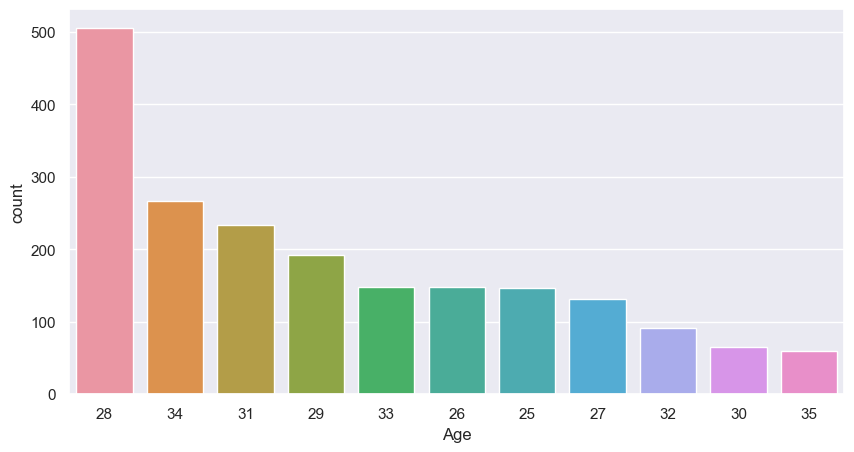

In [86]:

sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(x=df['Age'], order= df['Age'].value_counts().index)

*Muestra el rango de edades con las que cuenta el dataset y la cantidad de cada una de ellas. Existe un maximo numero de clientes de 28 años*

###Gráfico de líneas de la variable: 'FamilyMembers'

FamilyMembers
2     93
3    377
4    505
5    426
6    294
7    178
8     59
9     55
Name: FamilyMembers, dtype: int64


Text(8.194444444444445, 0.5, 'Frefuencia')

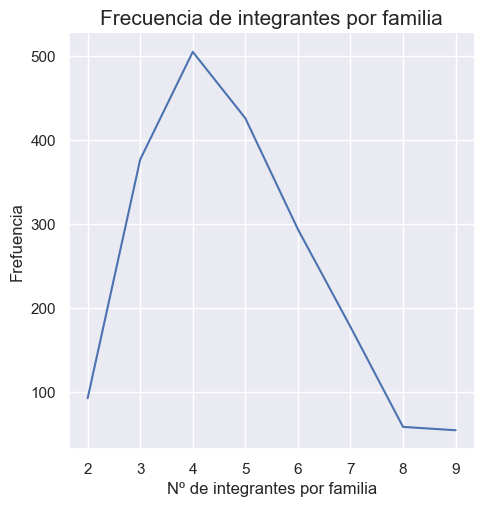

In [87]:
#Reporte
grouped = df['FamilyMembers'].groupby(df['FamilyMembers'])
print(grouped.count())

#Grafico
new = df.FamilyMembers.value_counts().sort_index()
sns.relplot(x = new.index, y = new.values, data = new, kind = "line")
plt.title('Frecuencia de integrantes por familia',fontdict={'fontsize':15})
plt.xlabel('Nº de integrantes por familia',fontdict={'fontsize':12})
plt.ylabel('Frefuencia',fontdict={'fontsize':12})

*Vemos que el maximo numero de clientes en nuestro dataset tiene 4 miembros de familia.* 

Hacemos un grafico de violin para verificar la distribucion.

###Grafico de Violin Family members

5.0

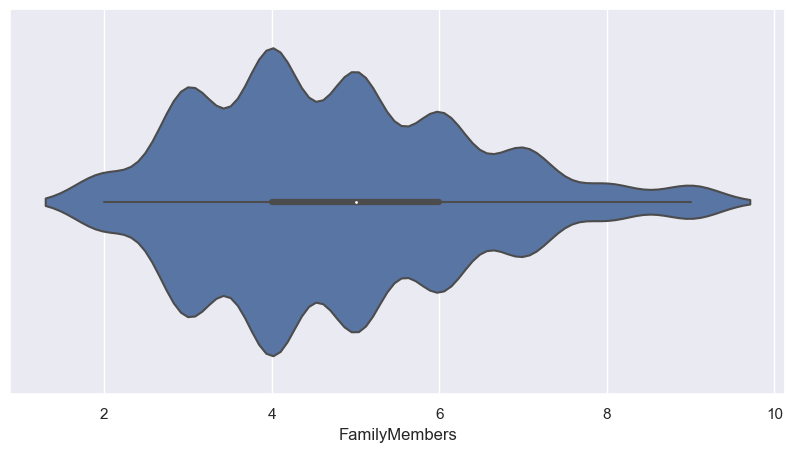

In [88]:
sns.violinplot(x=df.FamilyMembers)
np.median(df.FamilyMembers)

*Podemos ver la distribucion de miembros de familia de los clientes. Con una mediana de 5.*

###Histograma de la variable: 'AnnualIncome'

Text(0, 0.5, 'Frefuencia')

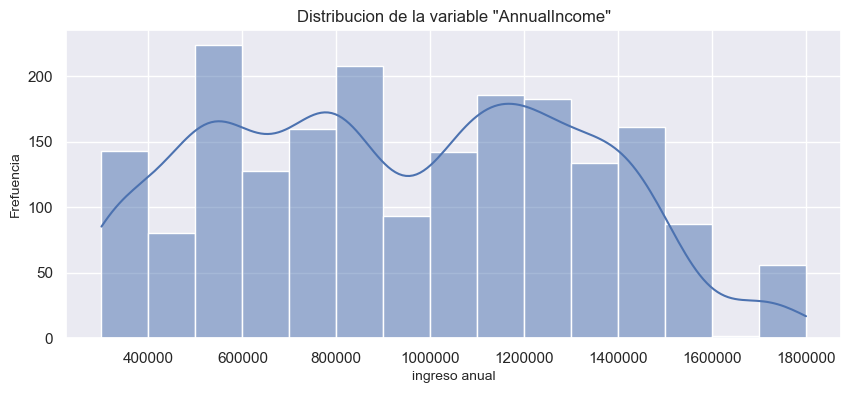

In [89]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x="AnnualIncome", kde= True)
plt.ticklabel_format(style='plain', axis='x')#Mantener el valor real y no en notacion cientifica
plt.title('Distribucion de la variable "AnnualIncome"',fontdict={'fontsize':12})
plt.xlabel('ingreso anual',fontdict={'fontsize':10})
plt.ylabel('Frefuencia',fontdict={'fontsize':10}) 

*Aca se pueden analizar los ingresos de los clientes de nuestro dataset. Es una variable importante a analizar posteriormente en conjunto con el target de clasificación.*

Frecuencia absoluta, la absoluta acumulada, la frecuencia relativa y relativa acumulada para la variable: TravelInsurance.

In [90]:
frec = df["TravelInsurance"].value_counts()
frec_df = pd.DataFrame(frec)
frec_df.rename(columns={'TravelInsurance':'Frec_abs'},inplace=True)
#Obtenemos los valores de las Frecuencias Absolutas
Frec_abs_val = frec_df["Frec_abs"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias absolutas acumuladas
acum = []

#Iniciamos una variable en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias absolutas para irlas sumando
for i in Frec_abs_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_abs_acum"] = acum

#Calculamos la Frecuencia Relativa en %
frec_df["frec_rel_%"] = round(100 * frec_df["Frec_abs"]/len(df.TravelInsurance),4)
#Obtenemos los valores de las Frecuencias Relativas
Frec_rel_val = frec_df["frec_rel_%"].values

#Creamos una lista vacia en donde vamos a guardar las frecuencias relativas acumuladas
acum = []

#Iniciamos una variable  en la que guardaremos los valores anteriores
valor_acum = 0

#Recorremos la lista  de las frecuencias relativas para  sumarlas
for i in Frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
    
frec_df["frec_rel_%_acum"] = acum
frec_df

Frec_abs  frec_abs_acum  frec_rel_%  frec_rel_%_acum
0      1277           1277     64.2677          64.2677
1       710           1987     35.7323         100.0000

*Sobre la variable Target podemos ver que existen un desbalanceo entre aquellos clientes que compraron el paquete de seguro de viaje y los que no. Algo a tener en cuenta cuando se trabaje con algoritmos de clasificacion.*

##Bivariado

*El análisis bivariado puede ayudar a determinar en qué medida es posible predecir el valor de una variable en el caso en que conozcamos el valor de otra variable.*

*La libreria de Pandas Profiling  es un módulo de Python de código abierto con el que podemos hacer rápidamente un análisis de datos exploratorio con solo unas pocas líneas de código.*

In [15]:
!pip uninstall pandas_profiling --quiet

In [17]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --quiet

In [91]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

*Profiling*: Un dato interesante obtenido del profiling, es que, salvo 'ChronicDiseases', las variables presentan alta correlación con una y o mas variables de la muestra.

##Matriz de correlacion entre variables

*La matriz de correlación muestra los valores de correlación de Pearson, que miden el grado de relación lineal entre cada par de elementos o variables. Los valores de correlación se pueden ubicar entre -1 y +1. Sin embargo, en la práctica, los elementos por lo general tienen correlaciones positivas.*

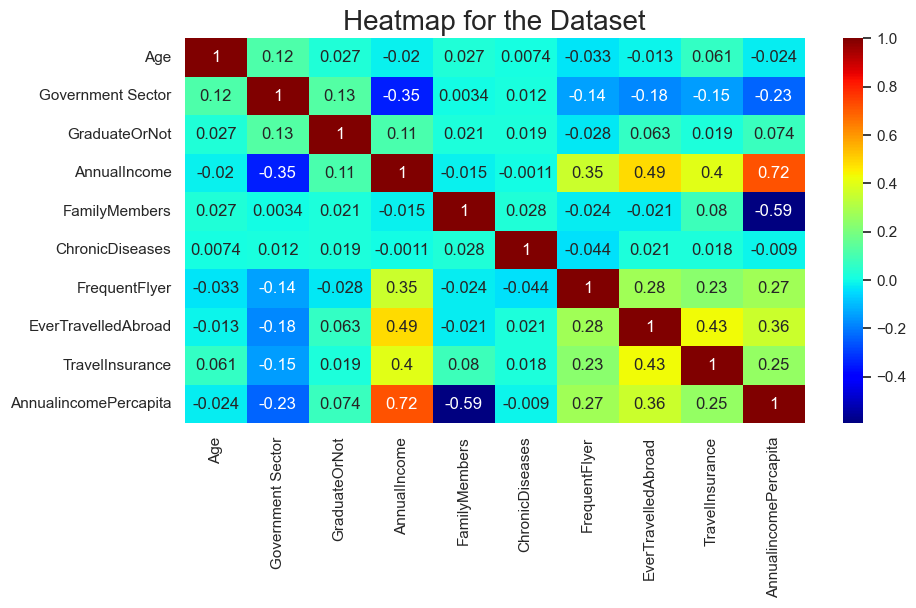

In [92]:
plt.rcParams['figure.figsize'] = (10, 5)

sns.heatmap(df.corr(), annot = True, cmap = 'jet')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

###Gráficos para analizar la relacion de 'Age' y 'TravelInsurance'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


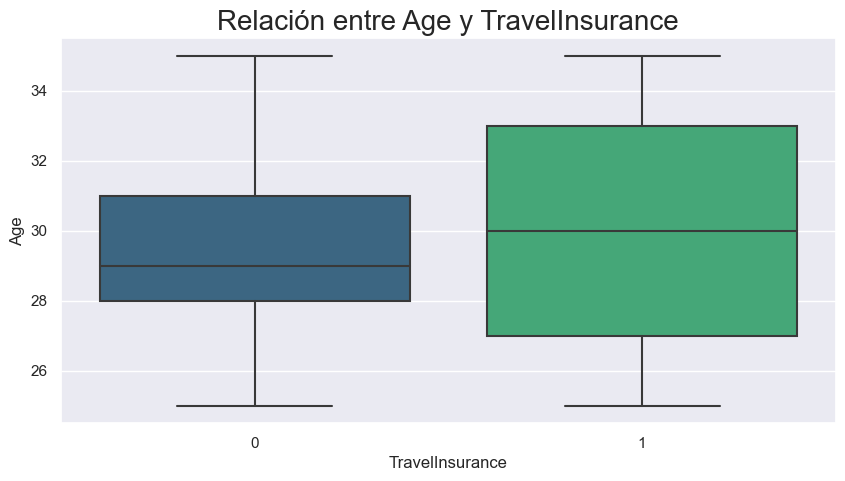

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


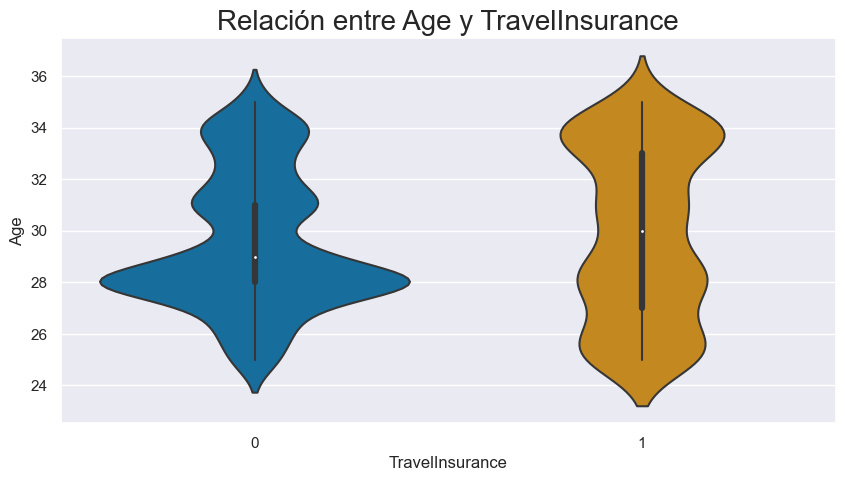

In [93]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot( df["TravelInsurance"],df["Age"], palette = 'viridis')
plt.title('Relación entre Age y TravelInsurance', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df["TravelInsurance"],df["Age"], palette = 'colorblind')
plt.title('Relación entre Age y TravelInsurance', fontsize = 20, fontweight = 30)
plt.show()

*'Age' y 'TravelInsurance': Las graficas nos comunican que la mediana de edad de los clientes que compran el seguro es un poco mas alta que la de los clientes que no. Tambien podemos observar que, a pesar de lo mencionado, las edades de clientes que compran el seguro está mas distribuida "uniformemente"*


###Gráfico para analizar la relacion de 'AnnualIncome' y 'TravelInsurance'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


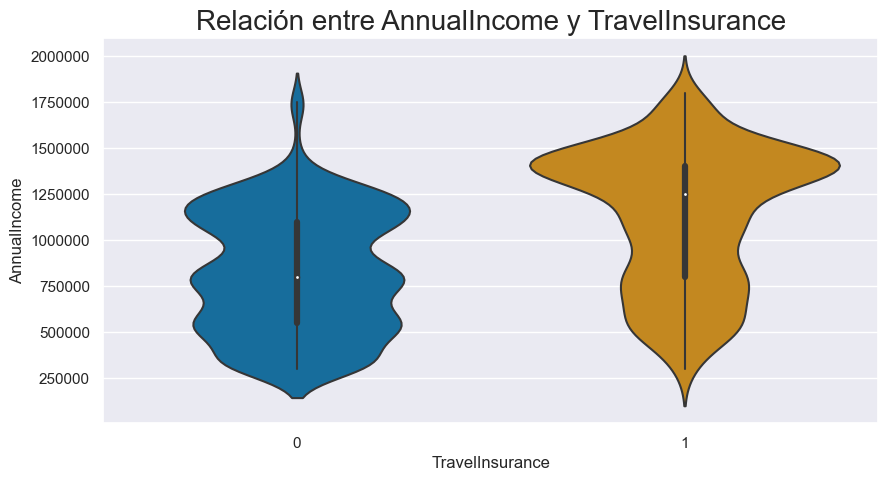

Text(0.5, 1.0, 'Relación entre AnnualIncome y TravelInsurance')

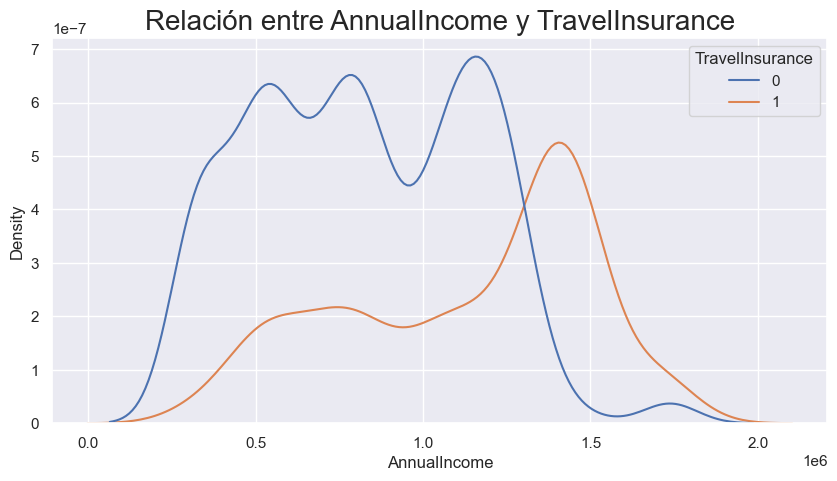

In [95]:

sns.violinplot(df["TravelInsurance"],df["AnnualIncome"], palette = 'colorblind')
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(df['AnnualIncome'], hue= df['TravelInsurance'])
plt.title('Relación entre AnnualIncome y TravelInsurance', fontsize = 20, fontweight = 30)

*'AnnualIncome' y 'TravelInsurance': Vemos que existen más clientes con mayor ingreso anual que compran el seguro de viaje.*

###Gráficos para analizar la relacion de 'FamilyMembers' y 'TravelInsurance'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


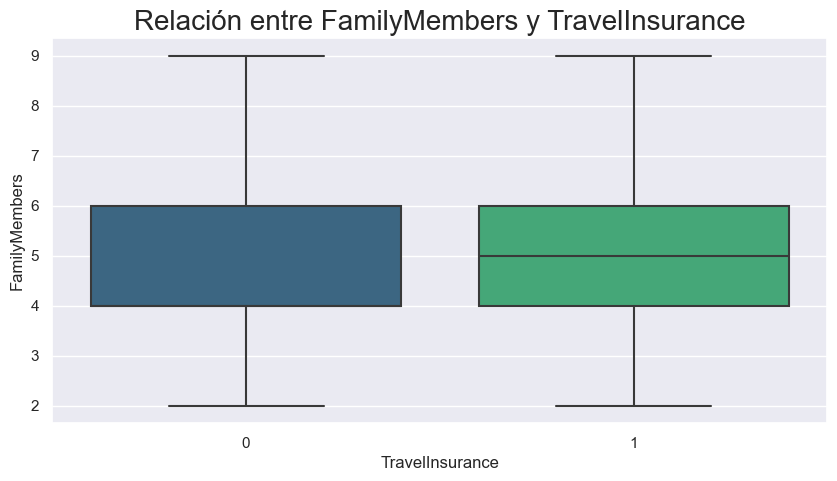

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


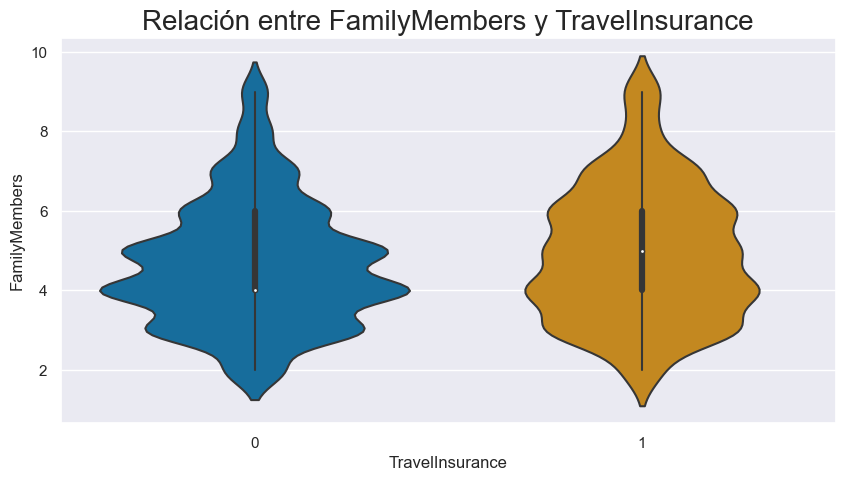

TravelInsurance
0    4.0
1    5.0
Name: FamilyMembers, dtype: float64

In [96]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.boxplot( df["TravelInsurance"],df["FamilyMembers"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20)
plt.show()

plt.rcParams['figure.figsize'] = (10, 5)
sns.violinplot(df["TravelInsurance"],df["FamilyMembers"], palette = 'colorblind')
plt.title('Relación entre FamilyMembers y TravelInsurance', fontsize = 20, fontweight = 30)
plt.show()

familia = df['FamilyMembers'].groupby(df['TravelInsurance']).median()
familia

*'FamilyMembers' y 'TravelInsurance': Las graficas nos comunican que la mediana de miembros de familia de los clientes que compran el seguro es un poco mas alta que la de los clientes que no.* 


     TravelInsurance     Mediana
            0              4.0
            1              5.0

###Gráfico para analizar la relacion de clientes con enfermedades crónicas y, a la vez, viajeros frecuentes

1    60
0    40
Name: TravelInsurance, dtype: int64

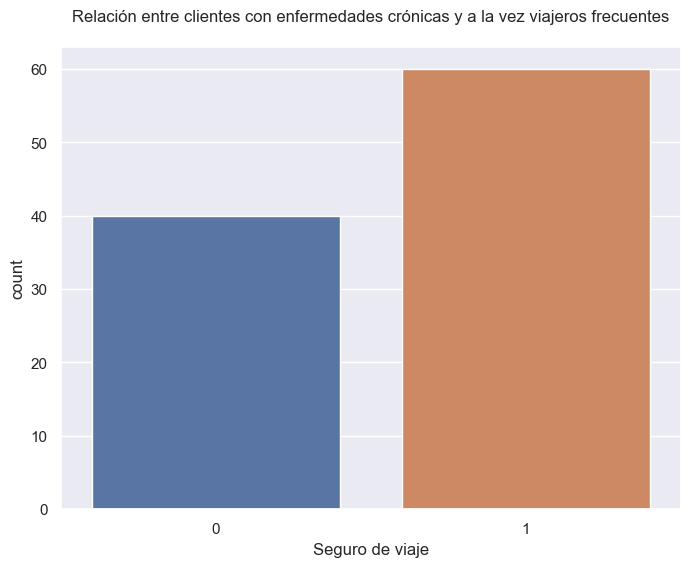

In [97]:
cdff = df[(df['FrequentFlyer']==1)&(df['ChronicDiseases']==1)]
plt.figure(figsize=(8,6))
sns.countplot(x = cdff['TravelInsurance'])
plt.title('Relación entre clientes con enfermedades crónicas y a la vez viajeros frecuentes\n', fontdict={'fontsize':12})
plt.xlabel('Seguro de viaje\n', fontdict={'fontsize':12})
cdff['TravelInsurance'].value_counts()

*FrequentFlyer y ChronicDiseases: Si bien, solo 100 personas cumplen con estas caracteristicas, representando un 5,03% del total de la muestra, podemos ver que el 60% de estos si contrata seguro de viaje.*

###Relación entre sector de trabajo y la adquisición de un seguro de viaje.

In [98]:
tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x / x.sum()), 2))

Government Sector  TravelInsurance
0                  0                  59.77
                   1                  40.23
1                  0                  75.44
                   1                  24.56
Name: Government Sector, dtype: float64

In [99]:
TOTAL = len(df)

In [100]:
tipotrabajo = df.groupby([df['Government Sector'],df['TravelInsurance']])['Government Sector'].count()
tipotrabajo.groupby(level=0).apply(lambda x: round((100 * x /TOTAL), 2))

Government Sector  TravelInsurance
0                  0                  42.63
                   1                  28.69
1                  0                  21.64
                   1                   7.05
Name: Government Sector, dtype: float64

<AxesSubplot:xlabel='TravelInsurance', ylabel='count'>

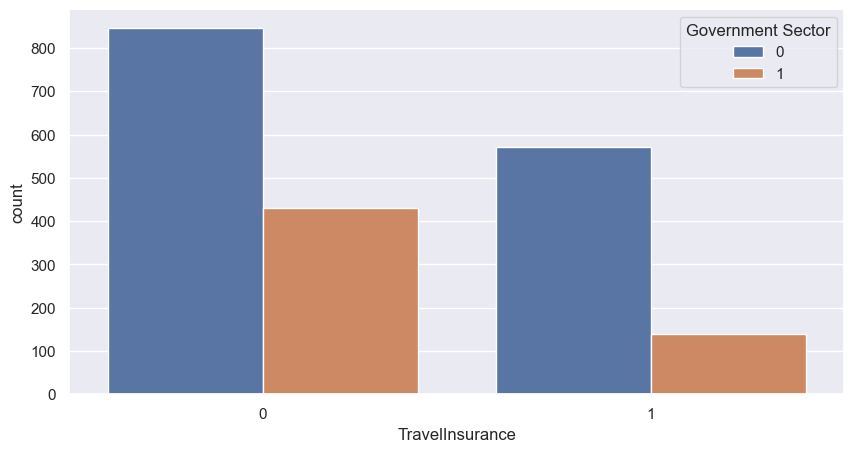

In [101]:
sns.countplot(x=df['TravelInsurance'], hue= df['Government Sector'])

 *Government Sector y TravelInsurance: Podemos ver que un 40,23% de los trabajadores del sector privado contrataron un seguro de viajes, representando un 28,69% del total, mientras que, de los trabajadores del sector gobierno, solo un 24,56% contrató este servicio, representando un 7,05% del total de la muestra.*

###Analizamos la relacion entre FamilyMembers y AnnualIncome

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


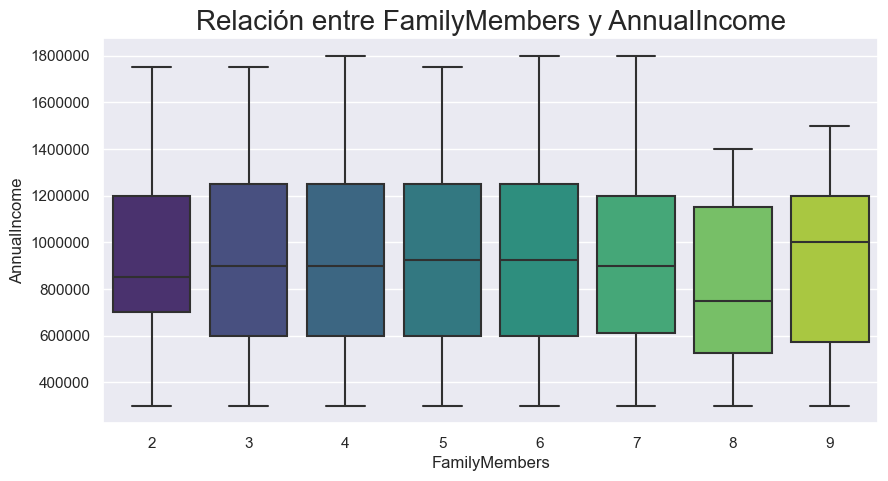

In [102]:
sns.boxplot( df["FamilyMembers"],df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre FamilyMembers y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

*FamilyMembers y AnnualIncome: Para clientes que cuentan con 8 miembros de familia la mediana del ingreso anual es la más baja de todas. Con 9 miembros de familia la situacion cambia,  de pronto la mediana es la mas alta de todas las demás.*

###Analizamos la relacion entre Age y AnnualIncome

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


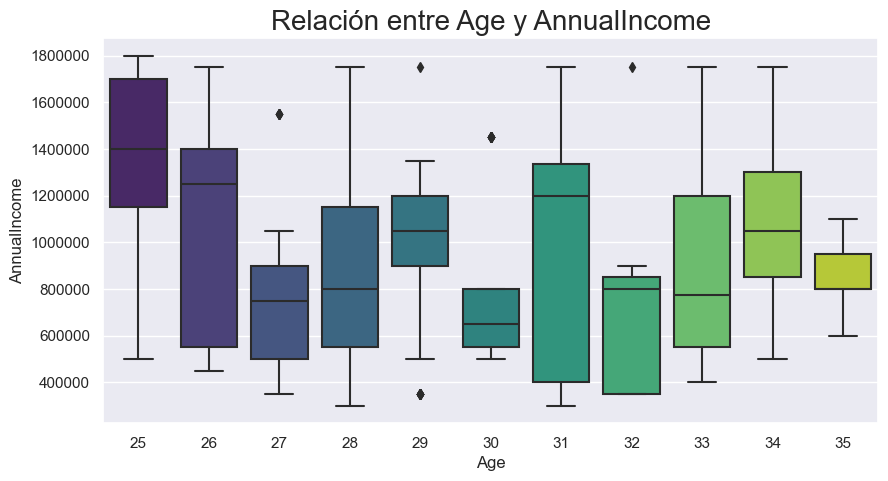

Age
25     7.35
26     7.45
27     6.59
28    25.47
29     9.66
30     3.27
31    11.78
32     4.58
33     7.45
34    13.39
35     3.02
Name: Age, dtype: float64

In [103]:
sns.boxplot( df["Age"],df["AnnualIncome"], palette = 'viridis')
plt.title('Relación entre Age y AnnualIncome', fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

edades = df.groupby([df['Age']])['Age'].count()
edades.groupby(level=0).apply(lambda x: round((100 * x /TOTAL), 2))

*Age y AnnualIncome: Podemos observar el rango del ingreso anual de los clientes segun su edad, siendo los 25 años la edad que posee la media mas alta y los 30 años la media mas baja, representando un 7,35% y 3,27% del total de la muestra respectivamente.*

##Multivariado

*
El propósito del análisis multivariante es medir, explicar y predecir el grado de relación que existe entre la variación (combinación lineal ponderada de las variables). El carácter multivariante del análisis descansa no sólo en el número de variables sino en las múltiples combinaciones existente entre las variables.*

Creamos un Pairplot del dataset teniendo en cuenta el target de clasificación

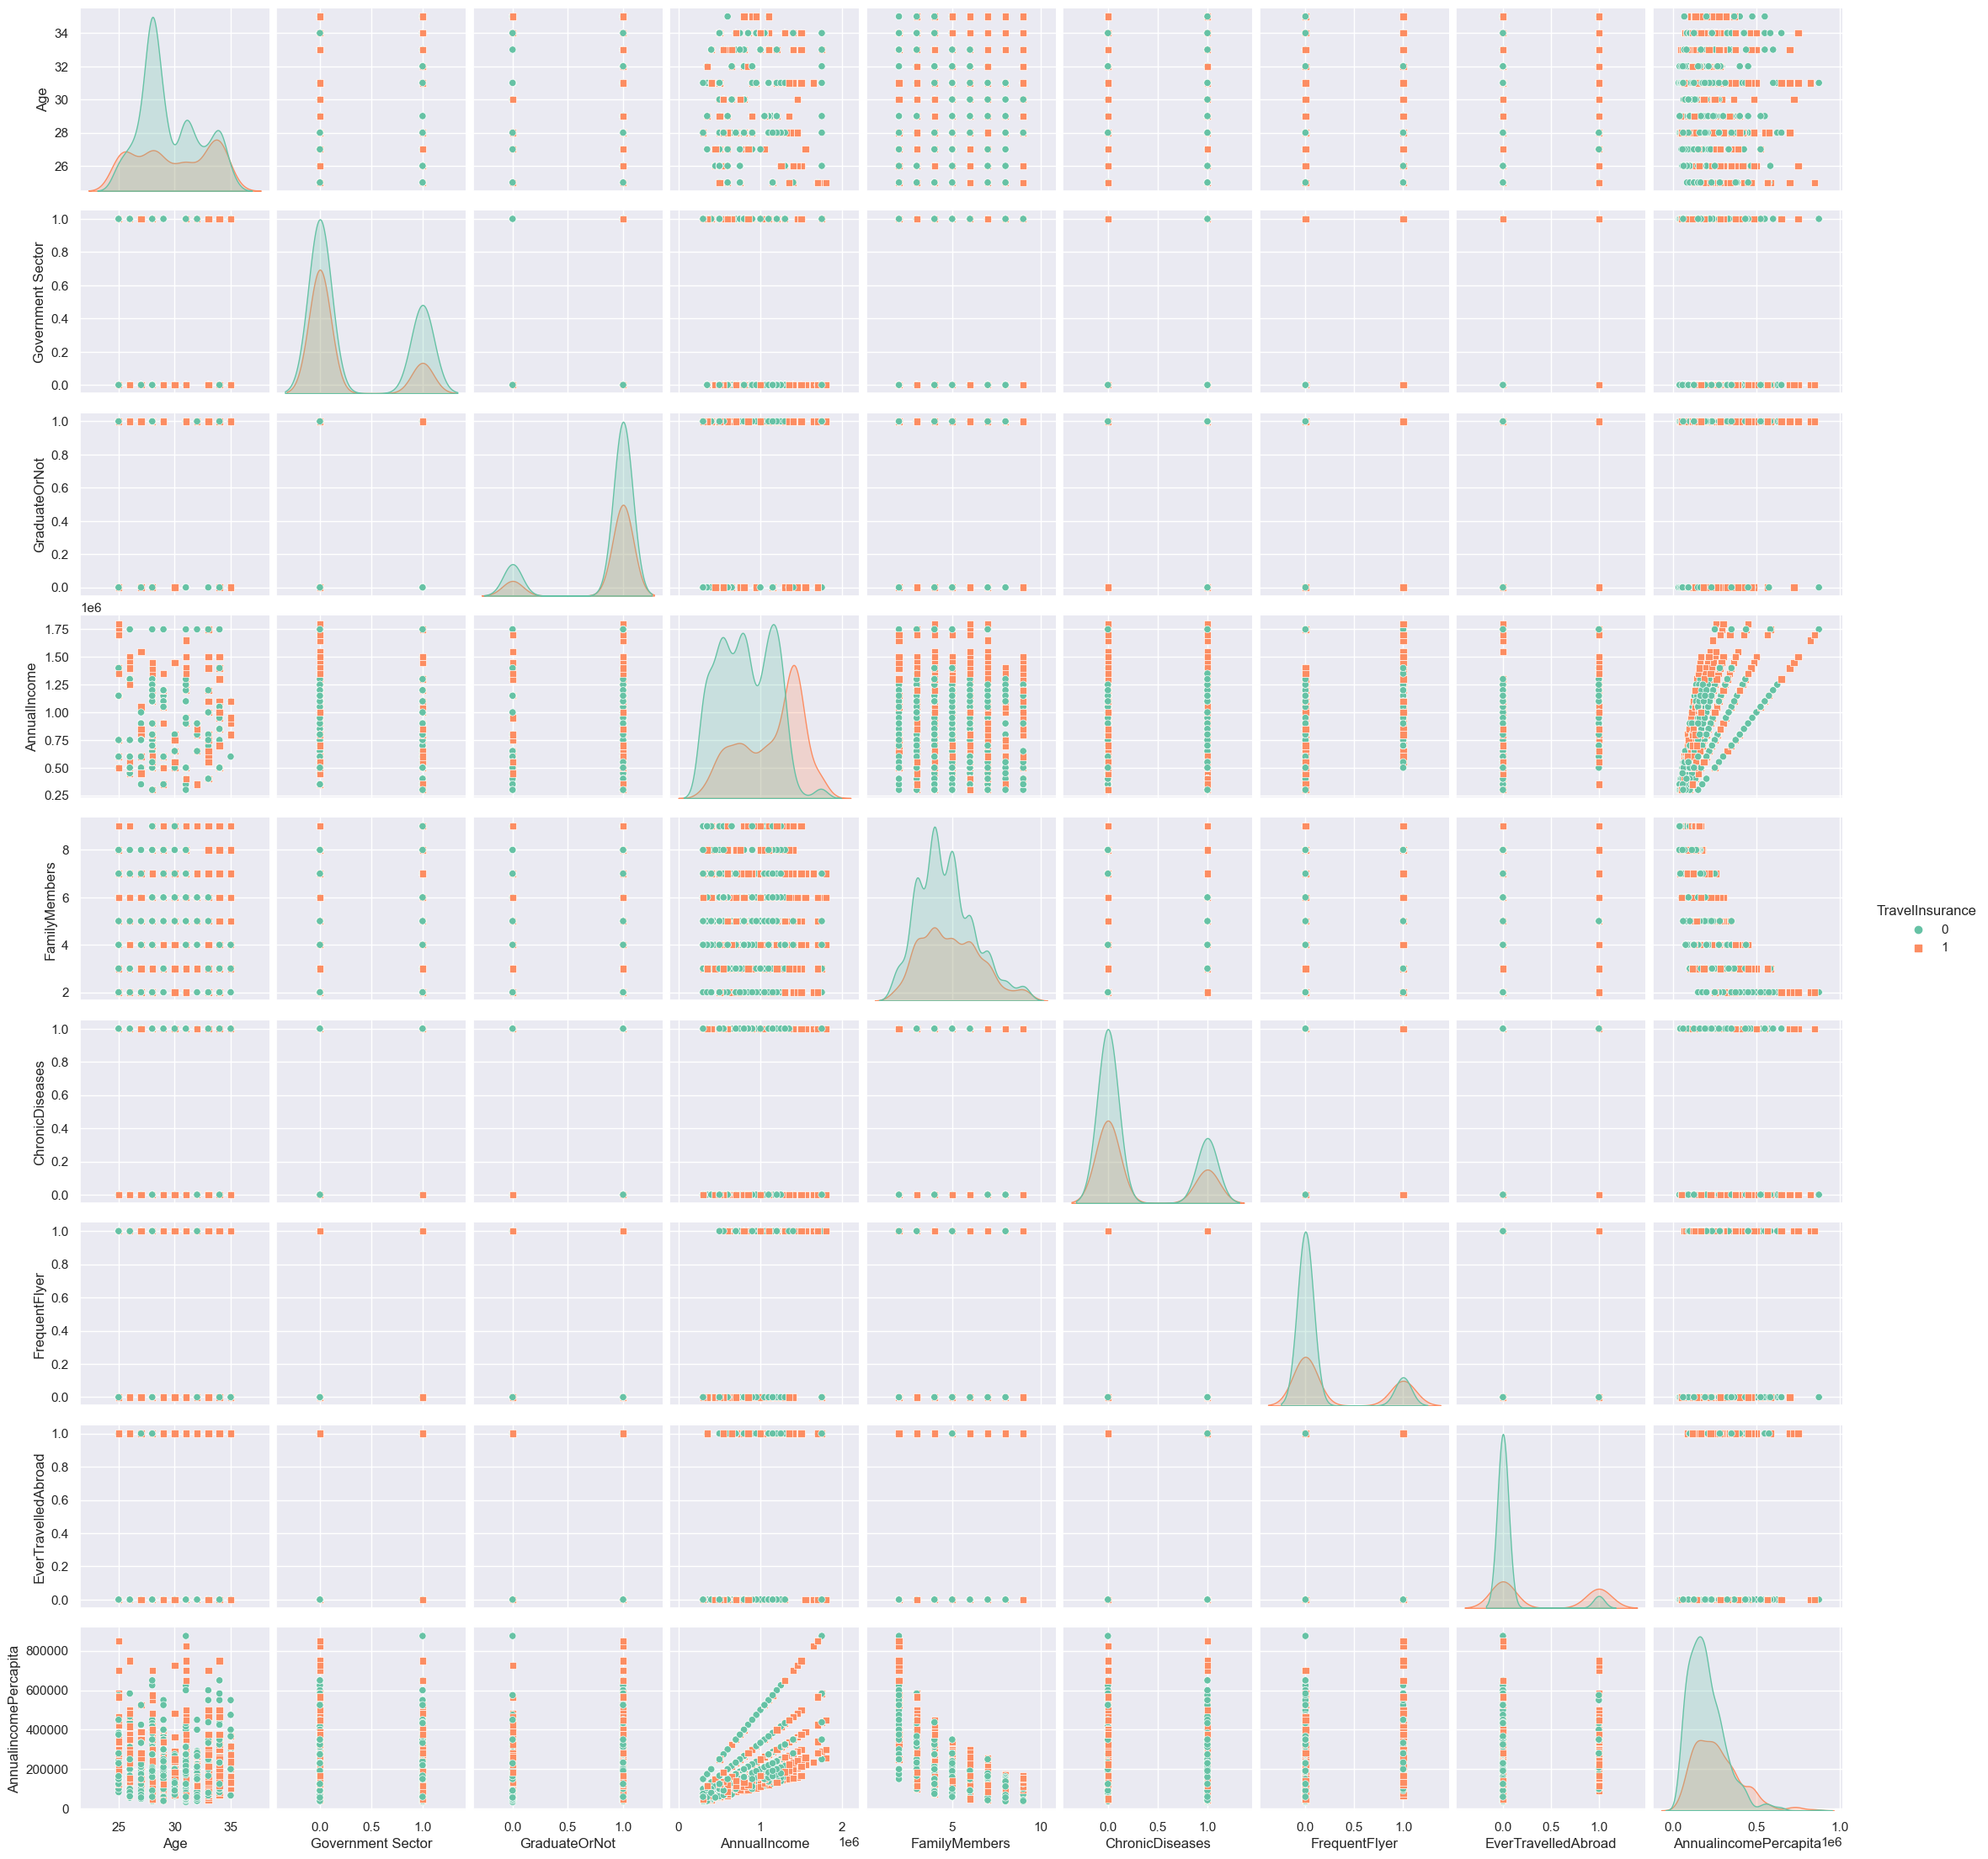

In [111]:
sns.pairplot(df,hue = 'TravelInsurance' ,  palette = 'Set2',markers=["o", "s"])
plt.show()

###Analizamos Relaciones entre variables

*Si existe relación entre variables significa que existe covariación, es decir, que el modo en que varían es más o menos conjunto. En otras palabras: observamos que cuando se da variación en una variable y en un sentido concreto, también se da variación en la otra u otras variables y también en un sentido concreto.*

Joint plot de AnnualIncome con otras variables ==> 

Correlacion entre AnnualincomePercapita y Age ==>  -0.023507069101451623


<Figure size 500x400 with 0 Axes>

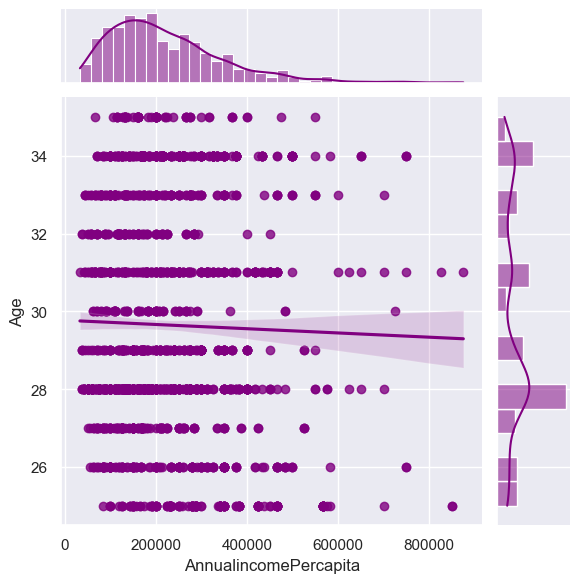

Correlacion entre AnnualincomePercapita y Government Sector ==>  -0.2344471104826761


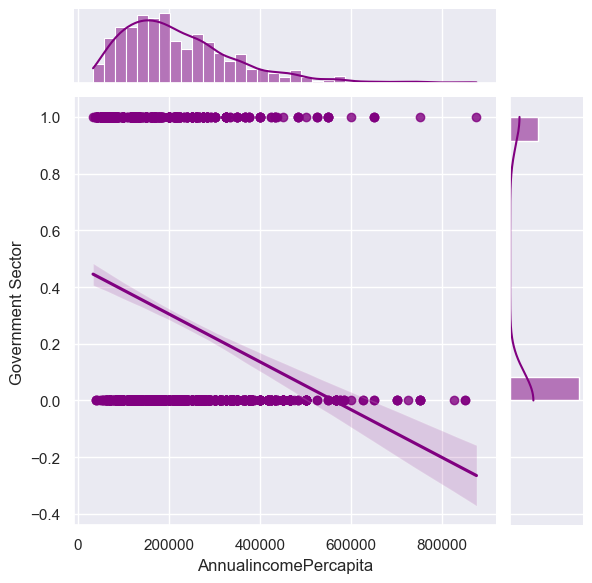

Correlacion entre AnnualincomePercapita y GraduateOrNot ==>  0.07407769703562418


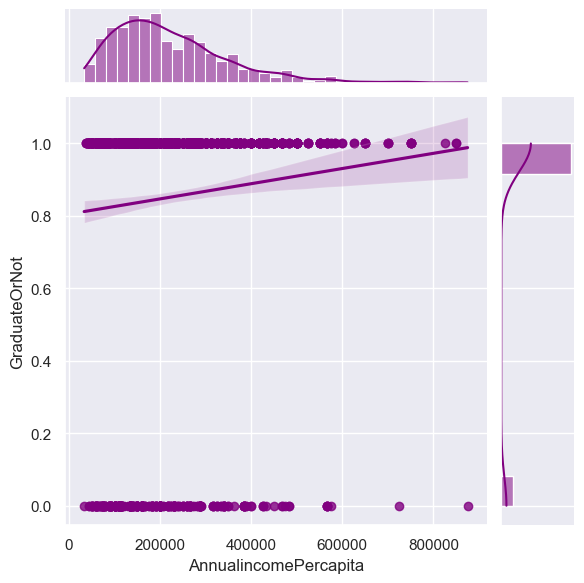

Correlacion entre AnnualincomePercapita y AnnualIncome ==>  0.7187403855182564


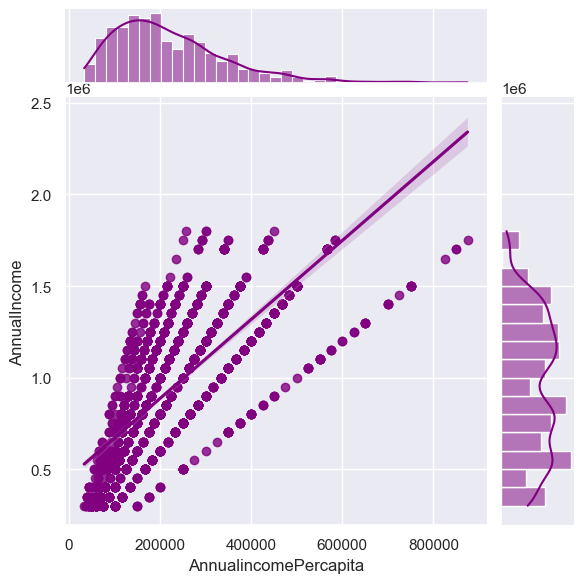

Correlacion entre AnnualincomePercapita y FamilyMembers ==>  -0.5927349285650099


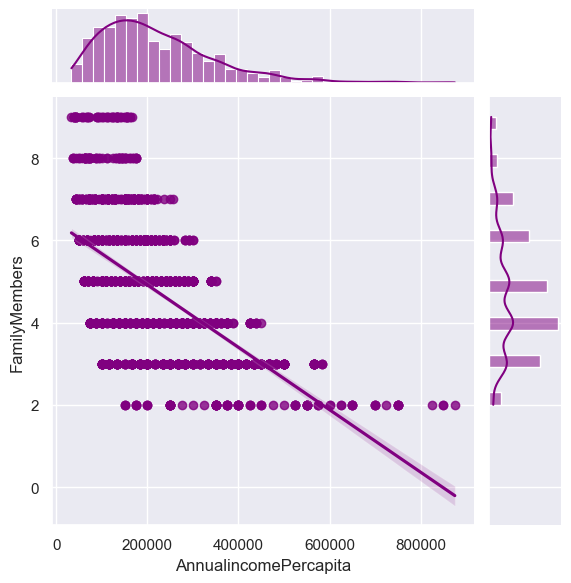

Correlacion entre AnnualincomePercapita y ChronicDiseases ==>  -0.008963143683216511


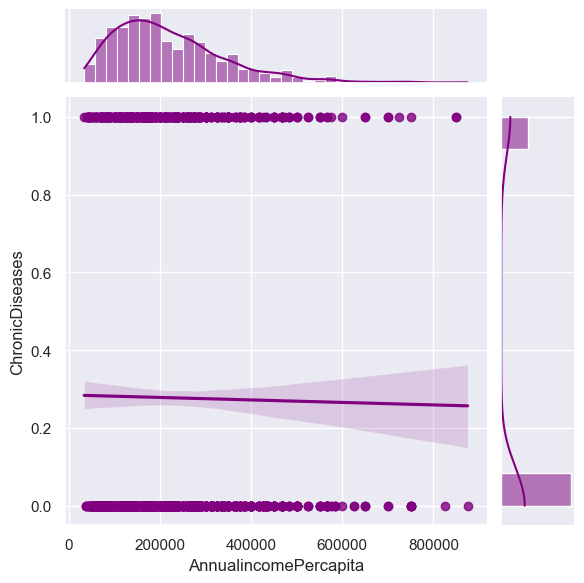

Correlacion entre AnnualincomePercapita y FrequentFlyer ==>  0.27220703777767713


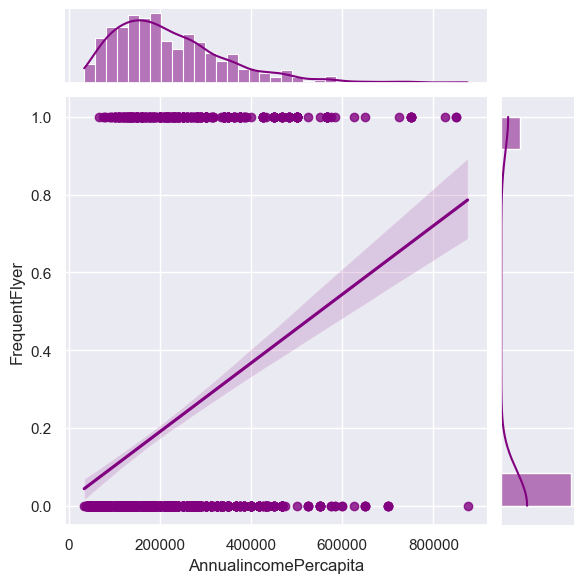

Correlacion entre AnnualincomePercapita y EverTravelledAbroad ==>  0.3582626435349857


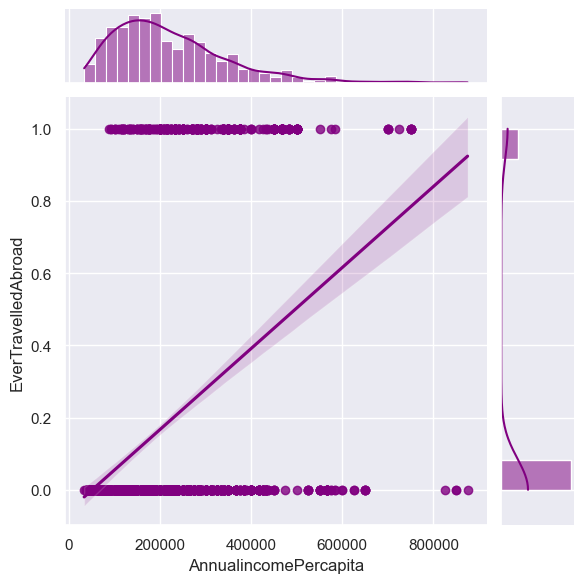

Relaciones positivas:  ['GraduateOrNot', 'AnnualIncome', 'FrequentFlyer', 'EverTravelledAbroad']
Relaciones negativas:  ['Age', 'Government Sector', 'FamilyMembers', 'ChronicDiseases']


In [112]:
#AnnualIncome
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de AnnualIncome con otras variables ==> \n")
rp=[]
rn=[]
for i in  df.columns:
    if i != 'AnnualincomePercapita' and i != 'TravelInsurance':
        print(f"Correlacion entre AnnualincomePercapita y {i} ==> ",df.corr().loc['AnnualincomePercapita'][i])
        if df.corr().loc['AnnualincomePercapita'][i]>0:
          rp.append(i)
        else:
          rn.append(i)
        sns.jointplot(x='AnnualincomePercapita',y=i,data=df,kind = 'reg',color = 'purple')
        plt.show()
print('Relaciones positivas: ', rp)
print('Relaciones negativas: ', rn)

**AnnualIncomePercapita:** *Existen relaciones positivas importantes con las variables Annualincome, FrequentFlyer y EverTravelledAboard, y negativas en las variables FamilyMembers y Government Sector.*

Relaciones positivas:  ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad', 'AnnualincomePercapita']

Relaciones negativas:  ['Age', 'Government Sector', 'FamilyMembers', 'ChronicDiseases']

#Modelos de Clasificación

##Arbol de decisión.

In [113]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

### Separo mis variable target del resto y luego divido mis datos en train y test para entrenar el algoritmo

In [114]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Uso gridsearchCV para determinar el valor óptimo de profundidad del arbol.

In [116]:
from sklearn.model_selection import GridSearchCV
    
param_grid = {
    "max_depth": [2,3,4,5,6,10,15,20,None],
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'max_depth': 3}
CV score for GS 0.8323759961272064


### Entreno el modelo en base al parametro obtenido y ploteo su estructura.

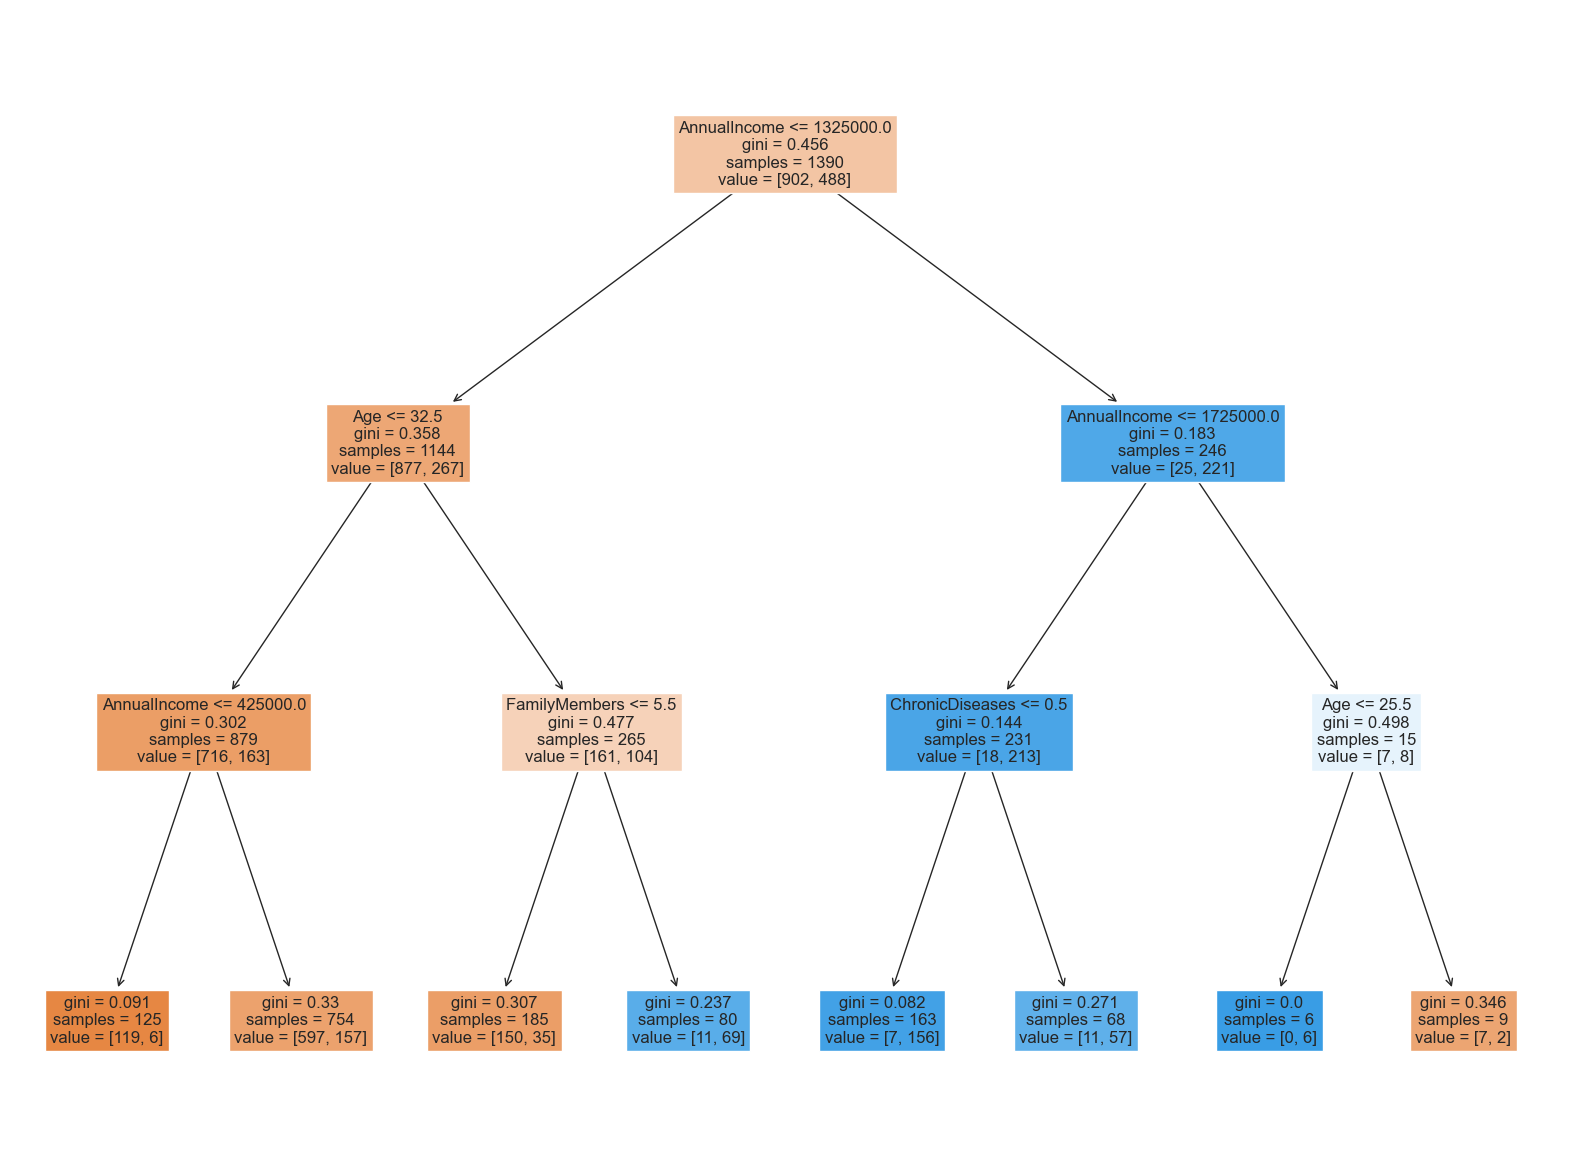

In [117]:
clf = DecisionTreeClassifier(random_state=42, max_depth=3)
model = clf.fit(X_train,y_train)
# Graficando
fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(clf,feature_names=X_train.columns,filled=True, fontsize=12)

In [118]:
y_train_pred_tree = clf.predict(X_train) #Prediccion en Train
y_test_pred_tree = clf.predict(X_test) #Prediccion en Test

### Genero mis predicciones y calculo el accuracy de mi modelo

In [119]:
from sklearn.metrics import accuracy_score

accuracy_tree_train = accuracy_score(y_train, y_train_pred_tree)
accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
precision_tree = precision_score(y_test, y_test_pred_tree)
recall_tree = recall_score(y_test, y_test_pred_tree)
f1_tree = f1_score(y_test, y_test_pred_tree)

print('Accuracy:', accuracy_tree)
print('Precisión:',precision_tree)
print('Recall:',recall_tree)
print('f1:',f1_tree)

NameError: name 'precision_score' is not defined

### Muestro la matriz de confusión y el reporte de clasificación

In [120]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(y_test, y_test_pred_tree)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[370   5]
 [ 92 130]]


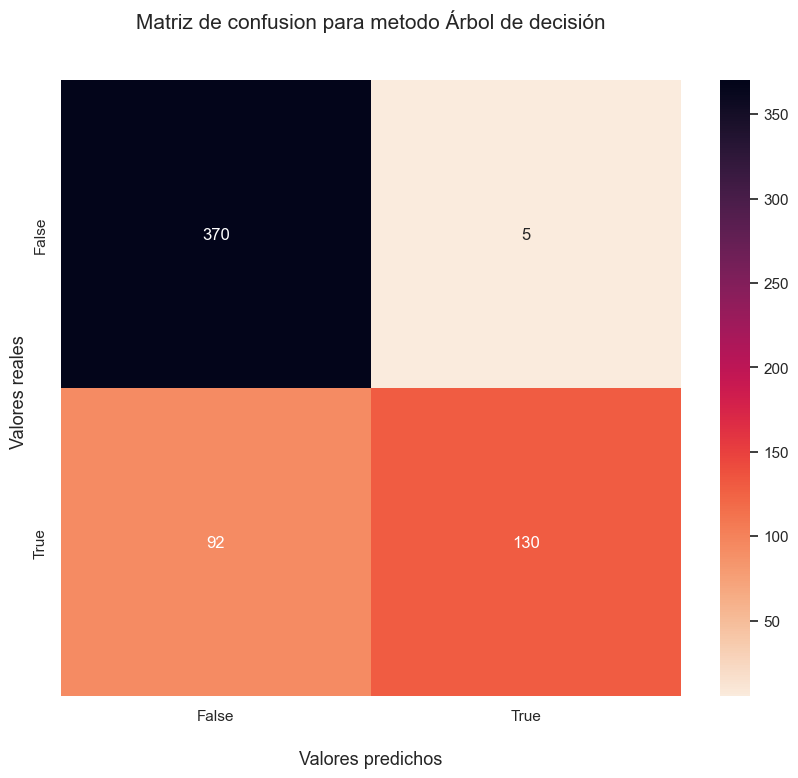

In [121]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz, annot=True, cmap='rocket_r', fmt='d')

ax.set_title('Matriz de confusion para metodo Árbol de decisión\n\n', fontdict={'fontsize':15});
ax.set_xlabel('\nValores predichos', fontdict={'fontsize':13})
ax.set_ylabel('Valores reales ', fontdict={'fontsize':13});
## Ticket labels - En orden alfabetico

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88       375
           1       0.96      0.59      0.73       222

    accuracy                           0.84       597
   macro avg       0.88      0.79      0.81       597
weighted avg       0.86      0.84      0.83       597



*Podemos observar una importante cantidad de falsos negativos repercutiendo en un Recall de 0.59, por el contrario existe una pequeña cantidad de falsos positivos, obteniendo un Precisión de 0.96, siendo la media armónica de 0.73 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.84.*


###Calculo la curva ROC

AUC for our classifier is: 0.7939219219219219


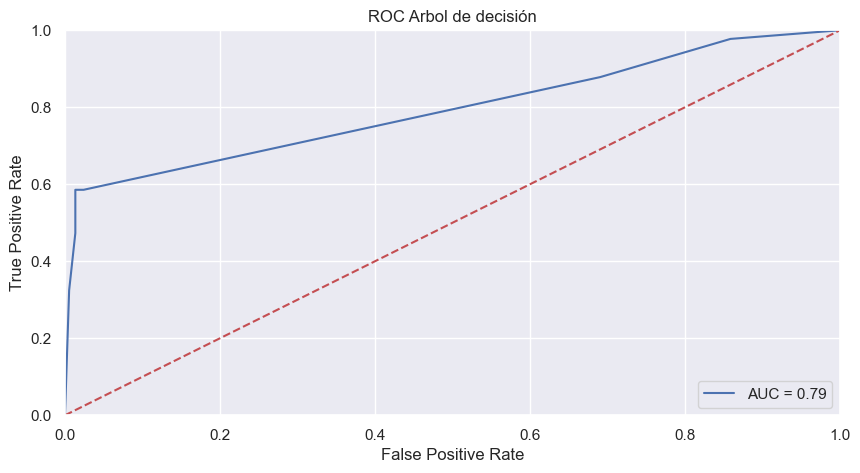

In [123]:
from sklearn.metrics import roc_curve, auc

class_probabilities = clf.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('ROC Arbol de decisión')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rocarbol.png')
plt.show()

###Importancia de variables

Text(0.5, 1.0, 'Importancia de cada feature')

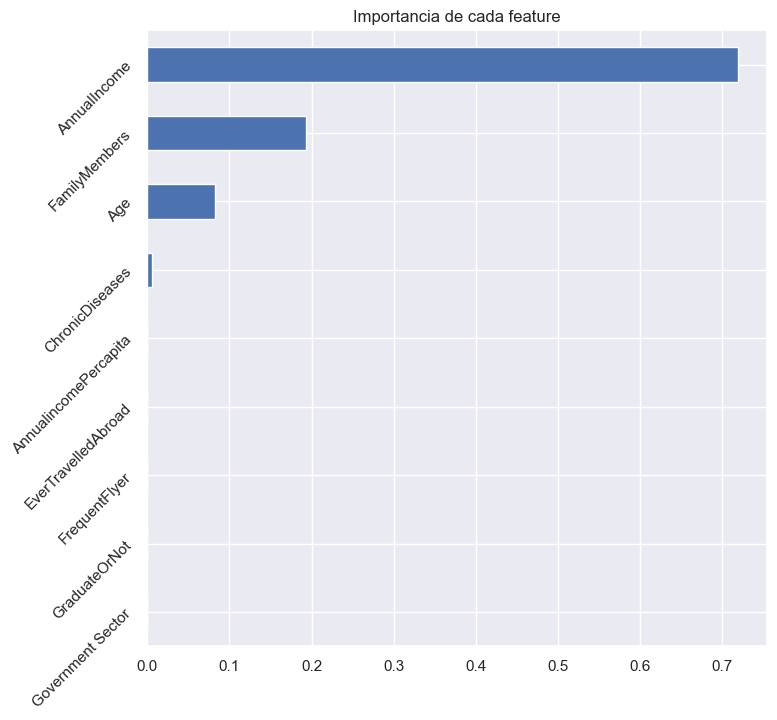

In [124]:
coef = pd.Series(model.feature_importances_, index = X.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8)
imp_coef.plot(kind = "barh", rot= 45)
plt.title("Importancia de cada feature")

*Parece extraña la cero importancia de la variable AnnualIncomePercapita, siendo que se comprende de las 2 variables que más importancia tienen. Significa que no contribuye en este modelo al resultado final de clasificación, al igual que las demás variables con importancia = 0.*

AnnualIncome: *Es la feature con mas importancia en este modelo, reflejando la correlacion con la variable target mencionada en el EDA.*

FamilyMembers: *Variable con la segunda mayor importancia del modelo, nos comunica como el modelo la tiene en cuenta a la hora de clasificar.*


EverTravelledAboard: *Variable de mayor correlacion con la variable target no parece ser importante al clasificar.*

## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

### Separo mis variable target del resto y luego divido mis datos en train y test para entrenar el algoritmo

In [125]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Uso gridsearchCV para determinar el valor óptimo de mi n neighbors.

In [126]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [4,5,6,7,10,15,20,None]
}

knn = KNeighborsClassifier()
grid_cv = GridSearchCV(knn, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'n_neighbors': 10}
CV score for GS 0.8035860579429507


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.79566824 0.78416158 0.79566204 0.7906302  0.80358606 0.79855112
 0.78993043        nan]
  warnings.warn(


In [127]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [128]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

### Genero mis predicciones y calculo el accuracy de mi modelo

In [129]:
from sklearn.metrics import accuracy_score

accuracy_knn_train =accuracy_score(y_train, y_train_pred)
accuracy_knn = accuracy_score(y_test, y_test_pred)
precision_knn = precision_score(y_test, y_test_pred)
recall_knn= recall_score(y_test, y_test_pred)
f1_knn = f1_score(y_test, y_test_pred)
print('Accuracy:', accuracy_knn)
print('Precisión:',precision_knn)
print('Recall:',recall_knn)
print('f1:',f1_knn)

NameError: name 'precision_score' is not defined

### Muestro la matriz de confusión y el reporte de clasificación

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(y_test, y_test_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[358  17]
 [110 112]]


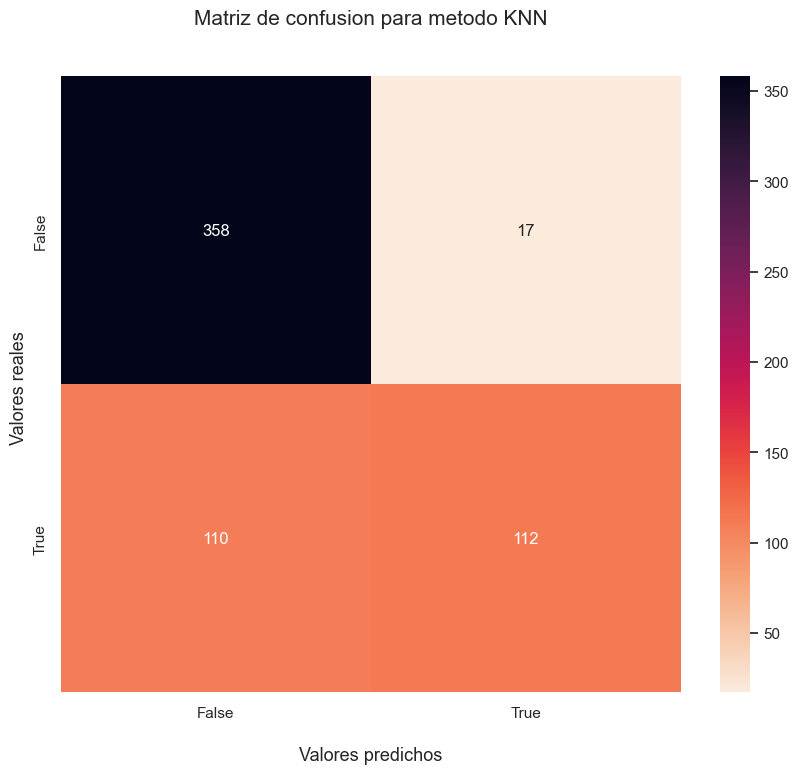

In [131]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz, annot=True, cmap='rocket_r', fmt='d')

ax.set_title('Matriz de confusion para metodo KNN\n\n', fontdict={'fontsize':15});
ax.set_xlabel('\nValores predichos', fontdict={'fontsize':13})
ax.set_ylabel('Valores reales ', fontdict={'fontsize':13});
## Ticket labels - En orden alfabetico

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.savefig('matrizknn.png')
plt.show()

In [132]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       375
           1       0.87      0.50      0.64       222

    accuracy                           0.79       597
   macro avg       0.82      0.73      0.74       597
weighted avg       0.80      0.79      0.77       597



*En este gráfico podemos  observar un aumento en la cantidad de falsos negativos con respecto al algoritmo anterior, llevando a un Recall de 0.50, a su vez, también existe un aumento de falsos positivos, reduciendo la Precisión a 0.90, Siendo la media armónica de 0.65 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.79.*

###Calculo la curva ROC

AUC for our classifier is: 0.7755615615615614


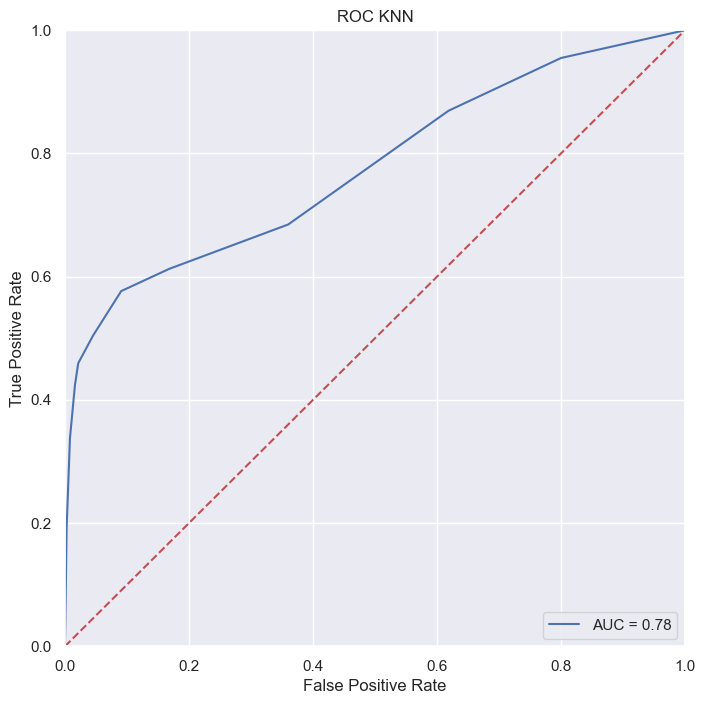

In [133]:
from sklearn.metrics import roc_curve, auc

class_probabilities = knn.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('ROC KNN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rocKNN.png')
plt.show()

## Regresión logistica

### Aplico estandarización de las variables

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
std_x = StandardScaler()
X_train = std_x.fit_transform(X_train)
X_test = std_x.transform(X_test)

### Aplico GridSearch para el paramatro 'solver'

In [135]:
param_grid = {
    "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

regresion_logistica = LogisticRegression()
grid_cv = GridSearchCV(regresion_logistica, param_grid, scoring="accuracy", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)

Param for GS {'solver': 'newton-cg'}
CV score for GS 0.7783880737816836


### Aplico el método

In [136]:
regresion_logistica = LogisticRegression(solver = 'newton-cg')

regresion_logistica.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [137]:
train_pred = regresion_logistica.predict(X_train)
test_pred = regresion_logistica.predict(X_test)

### Calculo el accuracy para las porciones train y test.

In [51]:
accuracy_rl_train = accuracy_score(y_train, train_pred)
accuracy_rl = accuracy_score(y_test, test_pred)
precision_rl = precision_score(y_test, test_pred)
recall_rl= recall_score(y_test, test_pred)
f1_rl = f1_score(y_test, test_pred)
print('accuracy:', accuracy_rl)
print('presición:',precision_rl)
print('Recall:',recall_rl)
print('f1:',f1_rl)

NameError: name 'precision_score' is not defined

### Muestro la matriz de confusión y el reporte de clasificación

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz = confusion_matrix(y_test, test_pred)
print('Matriz de Confusión:')
print(matriz)

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz, annot=True, cmap='rocket_r', fmt='d')

ax.set_title('Matriz de confusion para metodo Regresión logística\n\n', fontdict={'fontsize':15});
ax.set_xlabel('\nValores predichos', fontdict={'fontsize':13})
ax.set_ylabel('Valores reales ', fontdict={'fontsize':13});
## Ticket labels - En orden alfabetico

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
reporterl = classification_report(y_test, test_pred, output_dict=True)
reportedf =( pd.DataFrame(reporterl))
reportedf.T

*Para este método observamos un mayor aumento de los falsos negativos, superando incluso a los verdaderos positivos, repercutiendo en un Recall de 0.48. Al mismo tiempo, los falsos positivos tienen un incremento considerable, llevando a una precisión de 0.77, Siendo la media armónica de 0.59 entre estos valores.
La exactitud del algoritmo alcanza un valor de 0.75.*

###Calculo la curva ROC

In [43]:
from sklearn.metrics import roc_curve, auc

class_probabilities = regresion_logistica.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC for our classifier is: {roc_auc}")

# Gráfica de la Curva ROC
plt.title('ROC Regresión logística')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('rocreglog.png')
plt.show()

NameError: name 'regresion_logistica' is not defined

###Importancia de variables

Text(0.5, 1.0, 'Importancia de cada feature')

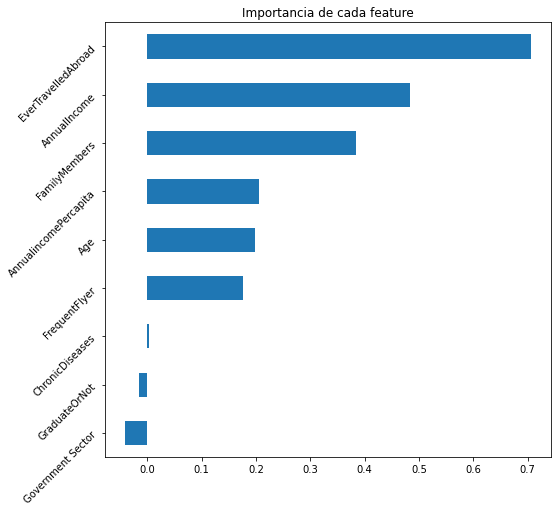

In [ ]:
coef = pd.Series(regresion_logistica.coef_[0], index = X.columns)

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8)
imp_coef.plot(kind = "barh", rot=45)
plt.title("Importancia de cada feature")

*Vemos la importancia de las variables a traves las pendientes o pesos del modelo. Siendo las variables* EverTravelledAbroad y AnnualIncome *las que tienen mas peso a la hora de clasificiar, como se analizó en el EDA teniendo en cuenta su correlacion. Tambien se refleja la importancia variable* FamilyMembers, *la cual juega un papel importante al clasificar.
En este modelo se puede ver la relevancia de* AnnualIncomePercapita *a diferencia del arbol de decisión.
La pendiente de la variable* ChronicDiseases *es casi 0, nos indica que no es una variable significante para la clasificación.*


 -

## Comparativa de metodos

###Curvas ROC

*En las gráficas ROC anteriores podemos observar las curvas ROC respectivas a cada modelo de ML aplicado, y sus respectivos valores de AUC. Si bien, los 3 algoritmos obtuvieron valores que podrían considerarse buenos, el método del árbol de decisión toma la delantera con un valor para AUC de 0.79, mientras que para el algoritmo de regresión logística el valor disminuye a 0.75, que podría ser interpretado como un resultado regular.*


### Metricas y graficas

####Visualizamos los accuracy por separado uniendo a cada tipo train y cada tipo test.

In [ ]:
acc = pd.DataFrame({'Métrica':['Accuracy train','accuracy test'],
                     'Arbol de decisión':[accuracy_tree_train,accuracy_tree],
                     'KNN':[accuracy_knn_train, accuracy_knn],
               'Regresión lógistica':[accuracy_rl_train, accuracy_rl]}).set_index('Métrica')

acc

Arbol de decisión       KNN  Regresión lógistica
Métrica                                                         
Accuracy train           0.835252  0.816547             0.782014
accuracy test            0.837521  0.793970             0.757119

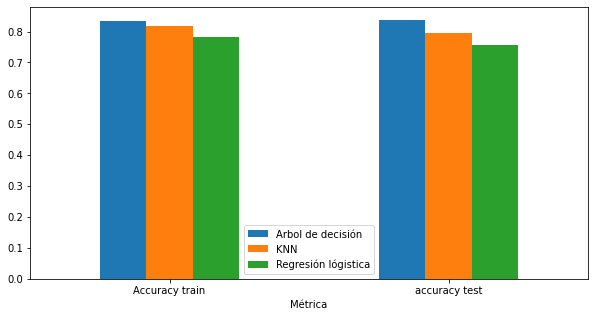

In [ ]:
acc.plot.bar(figsize=(10,5), rot=0)

####Visualizamos las metricas obtenidas por cada modelo.

In [ ]:
comp2 = pd.DataFrame({'Métrica':['Accuracy','Precisión','Recall','f1'],
                     'Arbol de decisión':[accuracy_tree,precision_tree,recall_tree,f1_tree],
                     'KNN':[accuracy_knn, precision_knn, recall_knn, f1_knn],
               'Regresión lógistica':[accuracy_rl, precision_rl, recall_rl,f1_rl]}).set_index('Métrica')

comp2

Arbol de decisión       KNN  Regresión lógistica
Métrica                                                    
Accuracy            0.837521  0.793970             0.757119
Precisión           0.962963  0.896000             0.776978
Recall              0.585586  0.504505             0.486486
f1                  0.728291  0.645533             0.598338

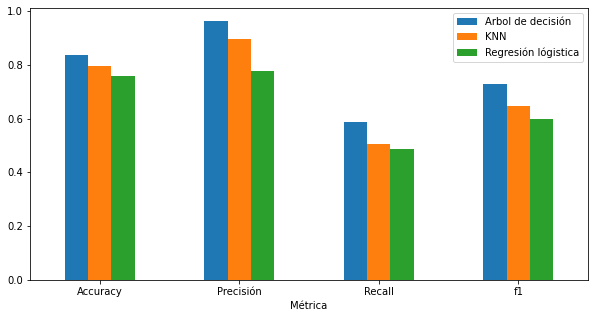

In [ ]:
comp2.plot.bar(figsize=(10,5), rot=0)

*De los resultados obtenidos por nuestros algoritmos podemos concluir que, si bien los 3 modelos generaron resultados de aceptables a buenos, el algoritmo de Árbol de decisión destaca por sobre el resto.
También podemos observar que los 3 algoritmos obtuvieron buenos resultados detectando a los clientes que no compran el seguro, pero no así para los clientes que si lo compran, esto puede deberse a un desbalance en nuestra variable target y será evaluado en futuras entregas.*


#Proximos Pasos

* Optimizar los modelos teniendo en cuenta los datos.
* Optimizar los modelos teniendo en cuenta sus hiperparametros.
* Evaluar los resultados obtenidos de entrenar diferentes algoritmos.
* Elección del mejor algoritmo a partir de criterios.
